# Pyplot tutorial

- [链接](https://matplotlib.org/3.2.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)

## Intro to pyplot

In [6]:
import matplotlib.pyplot as plt
import numpy as np

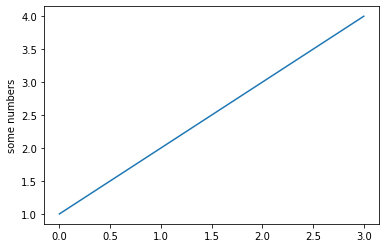

In [2]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

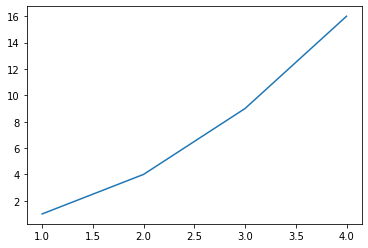

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

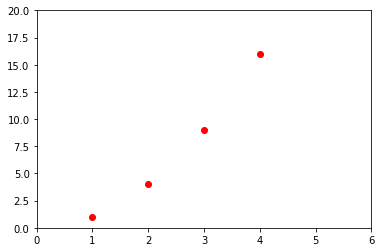

In [5]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

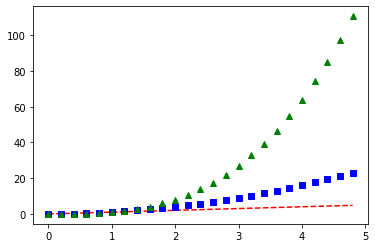

In [7]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## Plotting with keyword strings

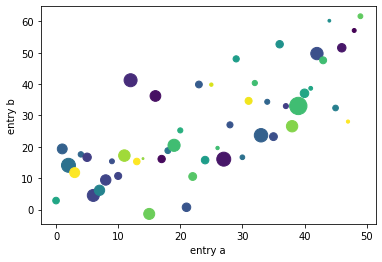

In [21]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

#plt.scatter('a', 'b', c='c', s='d', data=data)
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## Plotting with categorical variables

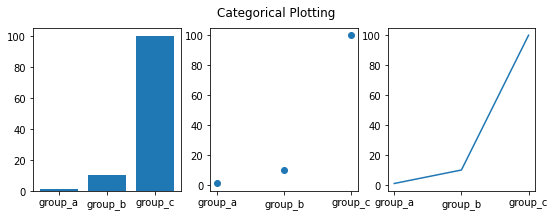

In [24]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Controlling line properties

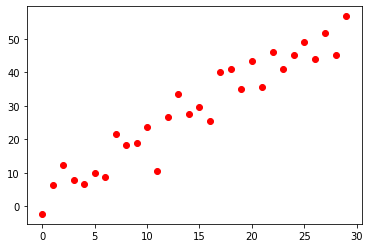

In [38]:
ns = 30
x = np.arange(ns)
y = x * 2 - 5*np.random.randn(ns)
plt.plot(x,y, 'ro')

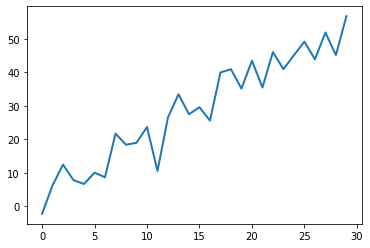

In [39]:
plt.plot(x, y, linewidth=2.0)

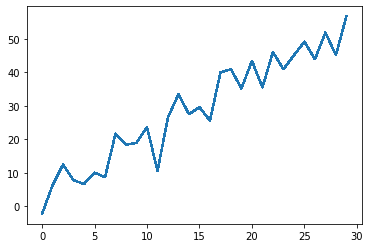

In [40]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialiasing

[None, None]

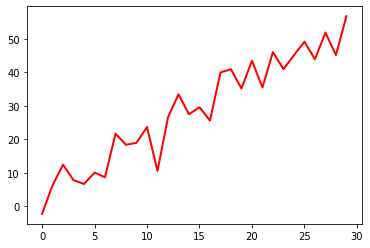

In [46]:
lines = plt.plot(x, y)
plt.setp(lines, color='r', linewidth=2.0)

[None, None]

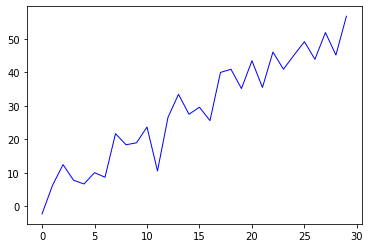

In [54]:
lines = plt.plot(x, y)
plt.setp(lines, 'color', 'b', 'linewidth', 1.0)
# plt.setp(lines)

## Working with multiple figures and axes

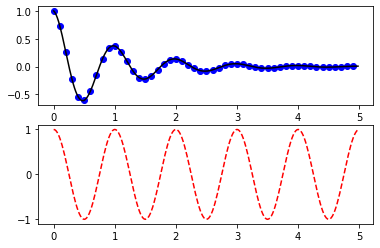

In [56]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

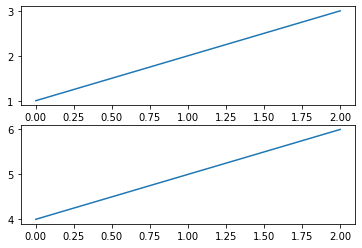

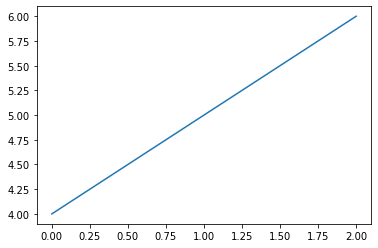

In [59]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

#plt.figure(1)                # figure 1 current; subplot(212) still current
#plt.subplot(211)             # make subplot(211) in figure1 current
#plt.title('Easy as 1, 2, 3') # subplot 211 title

If you are making lots of figures, you need to be aware of one more thing: the memory required for a figure is not completely released until the figure is explicitly closed with close(). Deleting all references to the figure, and/or using the window manager to kill the window in which the figure appears on the screen, is not enough, because pyplot maintains internal references until close() is called.

## Working with text

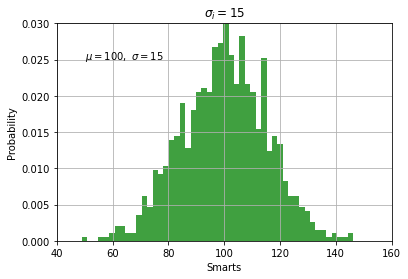

In [69]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(1000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
# plt.title('Histogram of IQ')
plt.title(r'$\sigma_i=15$')
plt.text(50, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

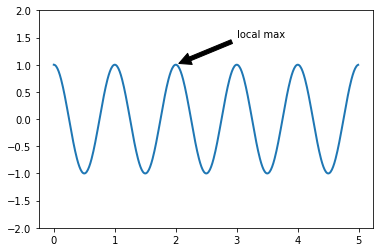

In [70]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

## Logarithmic and other nonlinear axes

<ipython-input-76-4fbb029cd89c>:34: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('symlog', linthreshy=0.01)


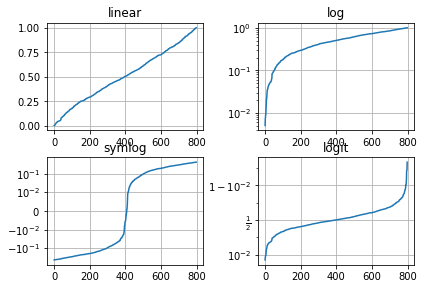

In [76]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()